# ML Wand - Audio - Steven Tagner

## This file is currently code I had from a project in my ML Class - I am waiting on getting the board in the mail so I can start gathering data and running tests, as such the code will not run at the moment and all the markdown comments are written as predictions/plans rather than comments on active code.

I will be testing several different models in an attempt to discover which works best for this situation. I will start with logistic regression, decision tree, and random forest models and compare them. I may look into trying new model types depending on how these do but there are no plans for that at the moment

Imported libraries:
<ul>
    <li>Pandas: for reading in data with a easy way to select the index column</li>
    <li>NumPy: for manipulating and editing data once it is read into our program</li>
    <li>SkLearn: to use the Decision Tree/Random Forest Classifier and Train/Test/Split functions</li>
    <li>MatPlotLib: to plot various graphics that will help us understand what is happening with our model such as confusion matrixies and classification reports</li>
    <li>Misc Libraries: sys, os, itertools, and traceback all provide support to our program</li>
</ul>

In [1]:
import sys, os
import traceback 
from itertools import chain
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Pre-Processing
Now we need to read in our data, format it, create our y set, and split it up to the train and test sets.

In [2]:
audioData = pd.read_csv("..\..\data\audioData.csv", index_col = 64)
data = np.array(audioData, ndmin =2)
# We reshape to 25 x 64 since there are 25 samples and 64 data points for each sample 
data = np.reshape(data, (25, 64))

nonAudioData = pd.read_csv("..\..\data\nonAudioData.csv", index_col = 64)
NonAudiodata = np.array(audioData, ndmin =2)
# We reshape to 25 x 64 since there are 25 samples and 64 data points for each sample 
NonAudiodata = np.reshape(data, (25, 64))

data = np.insert(data, (25), NonAudioData, 0)

# Our ML Model needs y values as a test set. We can create our y values with two simple loops
y = []
i=0
while i < 25:
    y.append(0)
    i+=1
i=0
while i < 25:
    y.append(1)
    i+=1

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)

## Modeling and Results
Now that our data is formatted we can start working with it, we'll start with a Logistic Regression Model:

Logisic Regression Precision, Recall, f1-Score, and Confusion Matrix:
 

Classification report for classifier logistic regression{clflr}:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Logistic Regression Precision, Recall, f-1 Score, and Confusion Matrix:
 



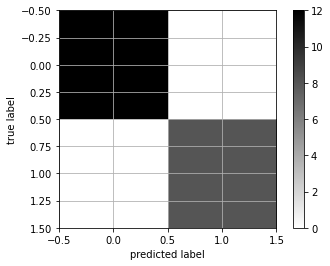

In [3]:
clflr = LogisticRegression(random_state=0)
clflr.fit(X_train, y_train)
predicted = clflr.predict(X_test)

print("Logisic Regression Precision, Recall, f1-Score, and Confusion Matrix:\n \n")

print("Classification report for classifier logistic regression{clflr}:")
print(metrics.classification_report(y_test, predicted))

plt.imshow(metrics.confusion_matrix(predicted, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(True)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

print("Logistic Regression Precision, Recall, f-1 Score, and Confusion Matrix:\n \n")


Then we can try a Decision Tree model:

Descision Tree Precision, Recall, f1-Score, and Confusion Matrix:
 

Classification report for classifier decision tree{clfdt}:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Descision Tree Precision, Recall, f-1 Score, and Confusion Matrix:
 



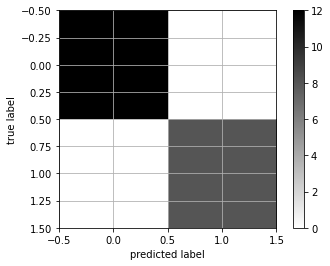

In [4]:
clfdt = DecisionTreeClassifier()
clfdt.fit(X_train, y_train)
predicted = clfdt.predict(X_test)

print("Descision Tree Precision, Recall, f1-Score, and Confusion Matrix:\n \n")

print("Classification report for classifier decision tree{clfdt}:")
print(metrics.classification_report(y_test, predicted))

plt.imshow(metrics.confusion_matrix(predicted, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(True)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");

print("Descision Tree Precision, Recall, f-1 Score, and Confusion Matrix:\n \n")

Now we can try Random Forests:

Classification report for random forest classifier {clfrf}:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



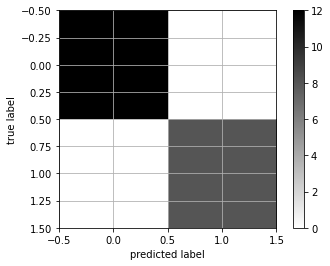

In [5]:
clfrf = RandomForestClassifier(max_depth = 3)
clfrf.fit(X_train,y_train)
ypredrf = clfrf.predict(X_test)

print("Classification report for random forest classifier {clfrf}:")
print(metrics.classification_report(y_test, predicted))

plt.imshow(metrics.confusion_matrix(ypredrf, y_test),
           interpolation='nearest', cmap=plt.cm.binary)
plt.grid(True)
plt.colorbar()
plt.xlabel("predicted label")
plt.ylabel("true label");


## Compiling the Chosen Model

This code is for outputting our chosen model into the Ardunion sketch in order to load onto the board

In [ ]:
from micromlgen import port

with open("audioCompile\audio_Classifier.h", "w") as file:
    file.write(port(clf, classname="Classifier"))